In [32]:
import pandas as pd
import pyodbc
from sqlalchemy import create_engine


server = 'NOTEBOOK'
database = 'Dados_de_Vendas'
username = 'sa'
password = '1234'
driver = 'ODBC Driver 17 for SQL Server'

conn_str = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'
engine = create_engine(conn_str)

sql_query = """
select 
	P.nome_Produtos as Produtos,
	SUM(V.quantidade_Vendas) AS QUANTIDADE
from
	Vendas V
INNER JOIN	
	Produtos P
ON V.ID_PRODUTO = P.ID_Produtos
GROUP BY P.nome_Produtos
ORDER BY QUANTIDADE DESC 
"""

dados = pd.read_sql(sql_query, engine)


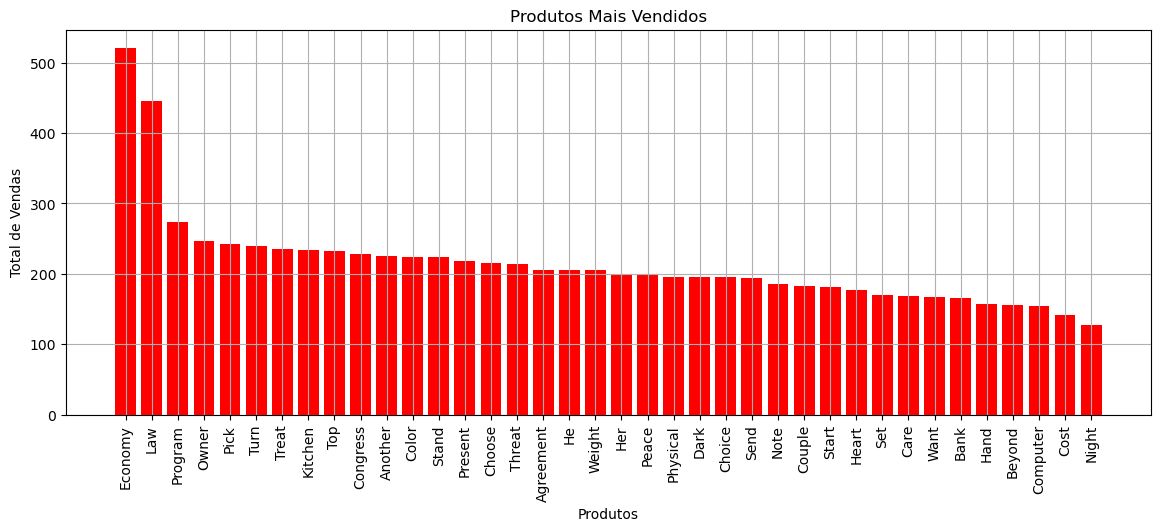

In [80]:

# Criar um gráfico de vendas ao longo do tempo
plt.figure(figsize=(14, 5))
plt.bar(dados['Produtos'], dados['QUANTIDADE'], color="red")

# Configurar o gráfico
plt.xlabel('Produtos')
plt.ylabel('Total de Vendas')
plt.title('Produtos Mais Vendidos')

plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo X para melhor visualização
plt.grid()

# Exibir o gráfico
plt.show()
